<a href="https://colab.research.google.com/github/andreadityam/used-car-eda/blob/main/Used_Car_Market_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET

In [ ]:
!pip install kagglehub[pandas-datasets]
!kaggle datasets download -d amanrajput16/used-car-price-data-from-cars24 --unzip

Dataset URL: https://www.kaggle.com/datasets/amanrajput16/used-car-price-data-from-cars24
License(s): apache-2.0
  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 39.2MB/s]


# LOAD DATASET DAN MEMERIKSA INFO DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# load datset
df = pd.read_csv("cars24data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [ ]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [ ]:
print(df.dtypes)

Model Name            object
Price                  int64
Manufacturing_year     int64
Engine capacity        int64
Spare key             object
Transmission          object
KM driven              int64
Ownership              int64
Fuel type             object
Imperfections          int64
Repainted Parts        int64
dtype: object


In [ ]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


# EXPLORATORY DATA ANALYSIS

**MISSING VALUE**

In [ ]:
#cek missing value
df.isnull().sum()

,0
Model Name,0
Price,0
Manufacturing_year,0
Engine capacity,0
Spare key,0
Transmission,0
KM driven,0
Ownership,0
Fuel type,0
Imperfections,0


**UNIVARIATE ANALYSIS**

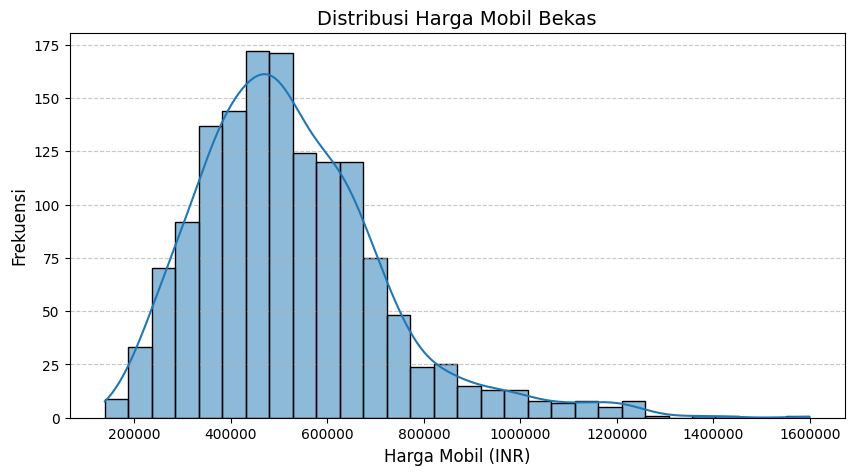

In [ ]:
"""
# Histogram Harga Mobil
plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribusi Harga Mobil Bekas")
plt.show()
"""

# Histogram Harga Mobil
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribusi Harga Mobil Bekas", fontsize=14)
plt.xlabel("Harga Mobil (INR)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Distribusi harga asli
plt.ticklabel_format(style='plain', axis='x')

plt.show()

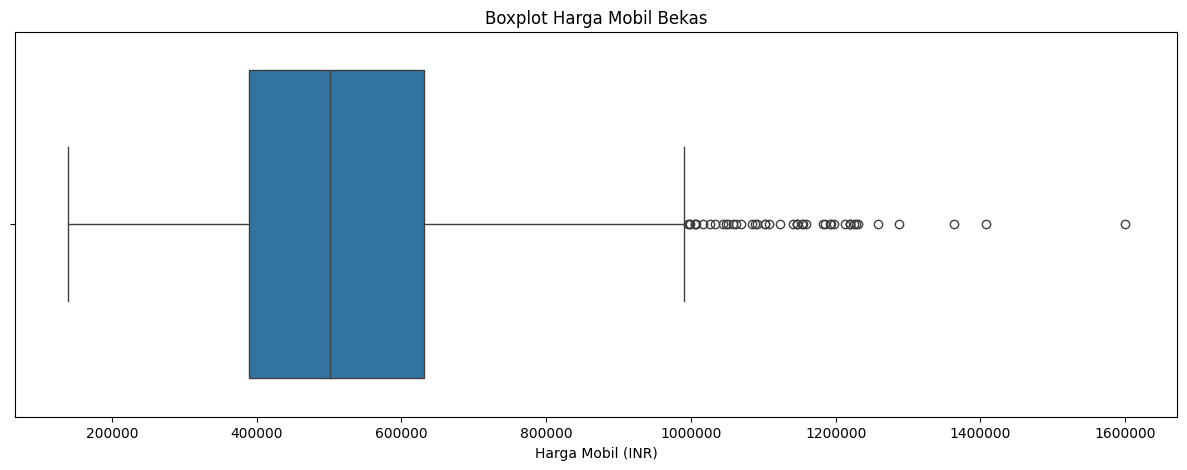

Q1 (Kuartil 1)  : 390000.0
Q2 (Median)     : 501000.0
Q3 (Kuartil 3)  : 631000.0
IQR             : 241000.0
Min (Minimum)   : 139000
Max (Maksimum)  : 1599000


In [ ]:
# Boxplot Harga Mobil untuk deteksi outlier
plt.figure(figsize=(15,5))
sns.boxplot(x=df["Price"])
plt.title("Boxplot Harga Mobil Bekas")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Harga Mobil (INR)")
plt.show()

# Menghitung statistik deskriptif
Q1 = df["Price"].quantile(0.25)  # Kuartil pertama (Q1)
Q2 = df["Price"].median()        # Median (Q2)
Q3 = df["Price"].quantile(0.75)  # Kuartil ketiga (Q3)
IQR = Q3 - Q1                    # Interquartile Range (IQR)
min_val = df["Price"].min()      # Nilai minimum
max_val = df["Price"].max()      # Nilai maksimum
print(f"Q1 (Kuartil 1)  : {Q1}")
print(f"Q2 (Median)     : {Q2}")
print(f"Q3 (Kuartil 3)  : {Q3}")
print(f"IQR             : {IQR}")
print(f"Min (Minimum)   : {min_val}")
print(f"Max (Maksimum)  : {max_val}")

**MULTIVARIATE ANALYSIS**

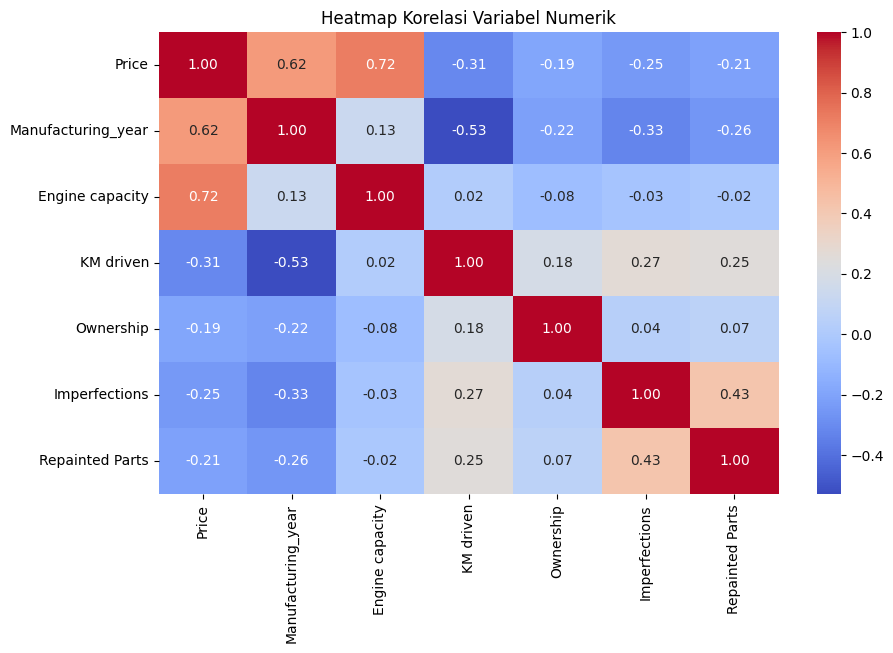

In [ ]:
numeric_df = df.select_dtypes(include=["number"])

# Korelasi antar variabel numerik
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

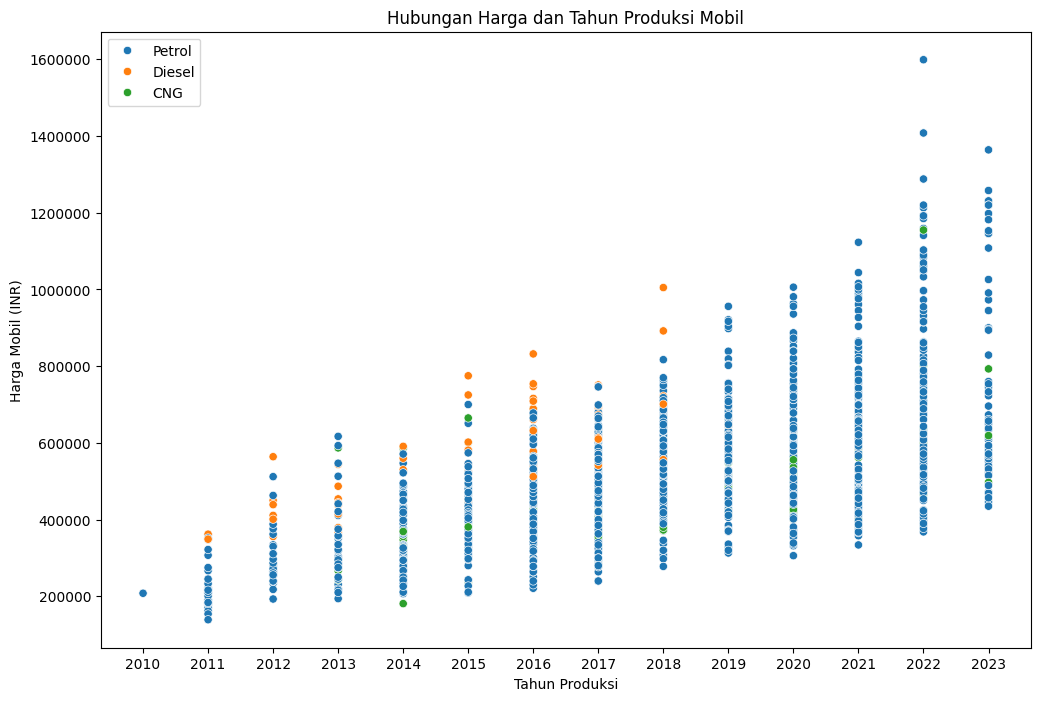

In [ ]:
# Scatter plot harga vs tahun mobil
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Manufacturing_year", y="Price", hue="Fuel type")
plt.title("Hubungan Harga dan Tahun Produksi Mobil")
plt.xlabel("Tahun Produksi")
plt.ylabel("Harga Mobil (INR)")
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y') #price
plt.xticks(sorted(df["Manufacturing_year"].unique())) #years

plt.show()

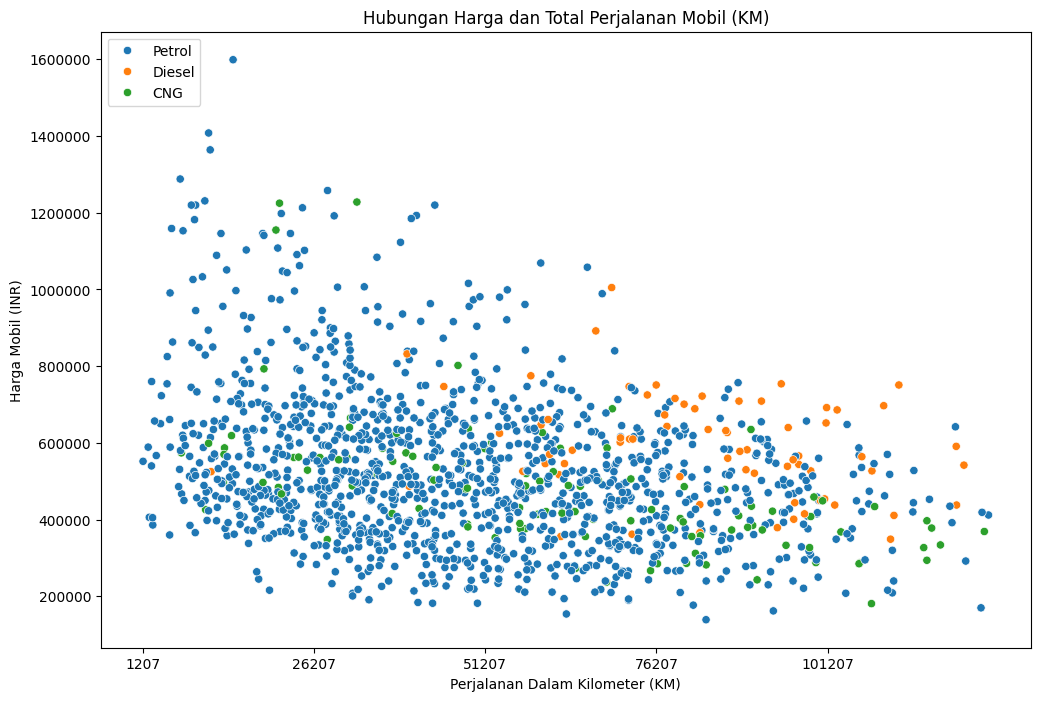

In [ ]:
# Scatter plot harga vs tahun mobil
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="KM driven", y="Price", hue="Fuel type")
plt.title("Hubungan Harga dan Total Perjalanan Mobil (KM)")
plt.xlabel("Perjalanan Dalam Kilometer (KM)")
plt.ylabel("Harga Mobil (INR)")
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y') #price
plt.xticks(sorted(df["KM driven"].unique())) #KM
plt.xticks(ticks=np.arange(min(df['KM driven']), max(df['KM driven']), 25000))

plt.show()

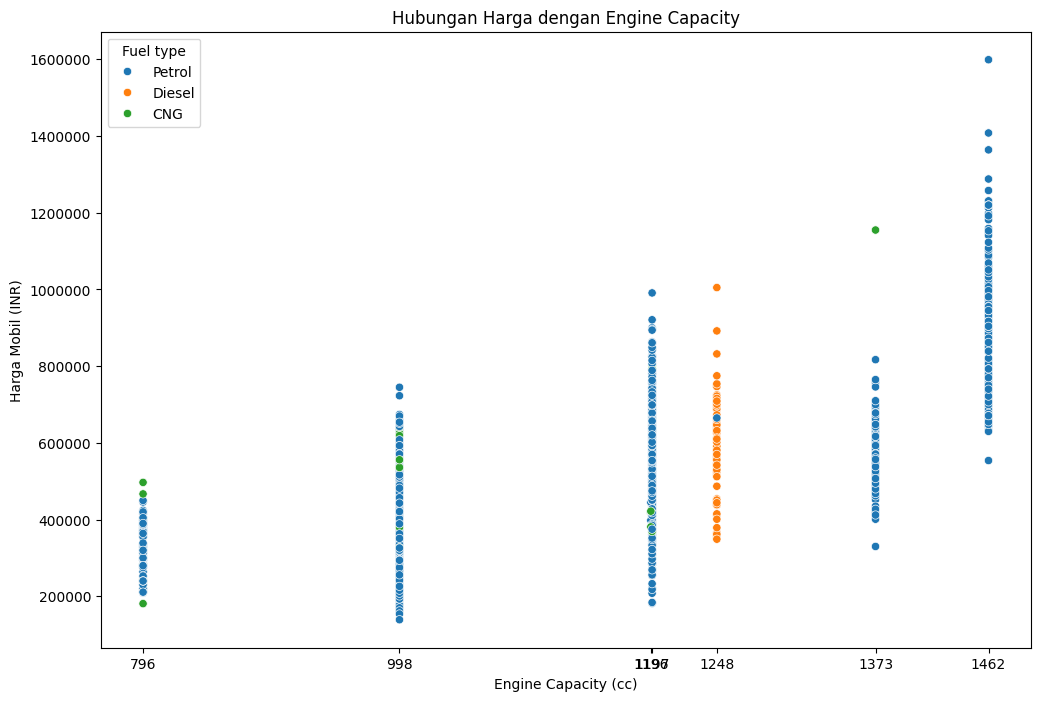

In [ ]:
# Scatter plot harga vs engine
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Engine capacity", y="Price", hue="Fuel type")
plt.title("Hubungan Harga dengan Engine Capacity")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Harga Mobil (INR)")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(sorted(df["Engine capacity"].unique()))

plt.show()

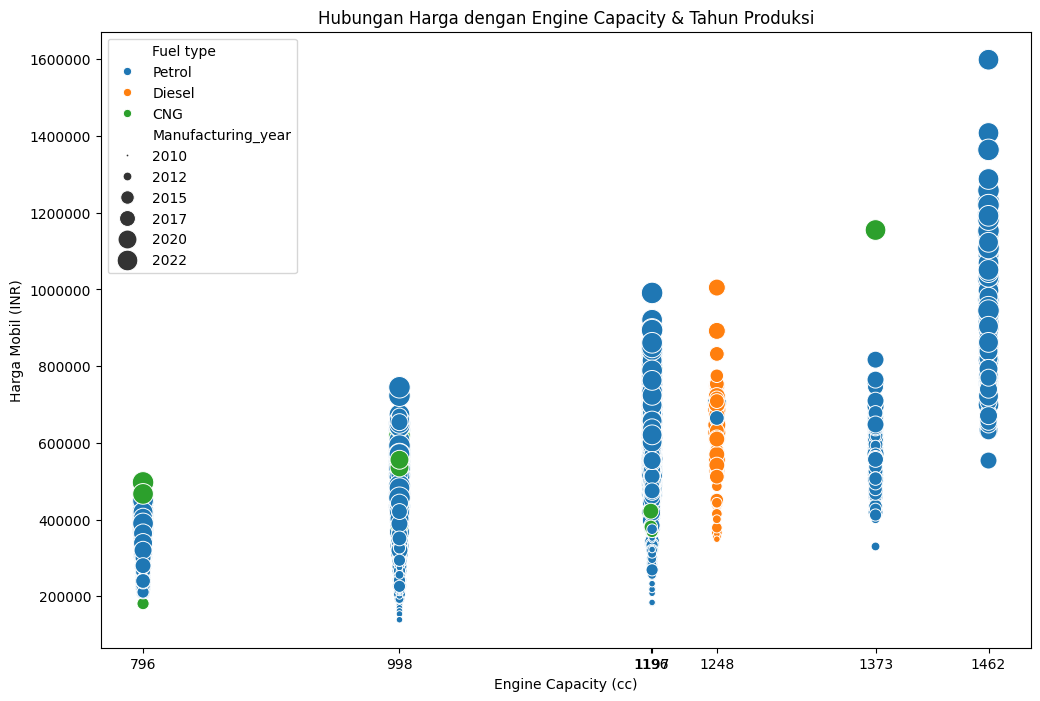

In [ ]:
#Manufacturing year Perception
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Engine capacity", y="Price", hue="Fuel type", size="Manufacturing_year", sizes=(4, 240))
plt.title("Hubungan Harga dengan Engine Capacity & Tahun Produksi")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Harga Mobil (INR)")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.xticks(sorted(df["Engine capacity"].unique()))

plt.show()

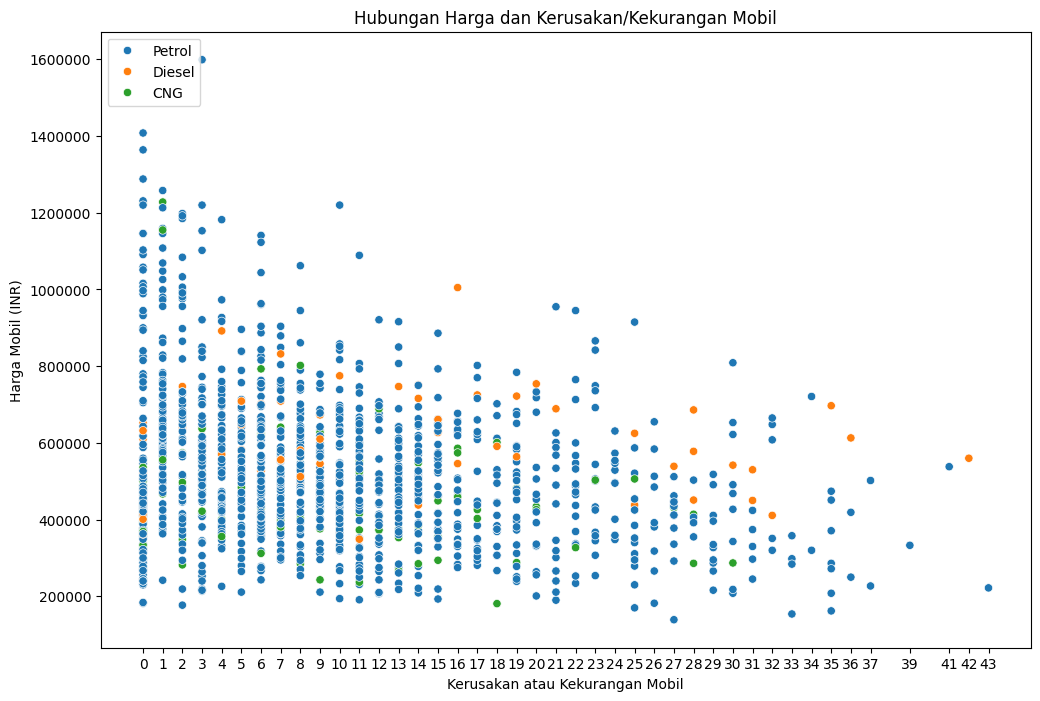

In [ ]:
# Scatter plot harga vs tahun mobil
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Imperfections", y="Price", hue="Fuel type")
plt.title("Hubungan Harga dan Kerusakan/Kekurangan Mobil")
plt.xlabel("Kerusakan atau Kekurangan Mobil")
plt.ylabel("Harga Mobil (INR)")
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y') #price
plt.xticks(sorted(df["Imperfections"].unique())) #imperfections

plt.show()

**CATEGORICAL ANALYSIS**

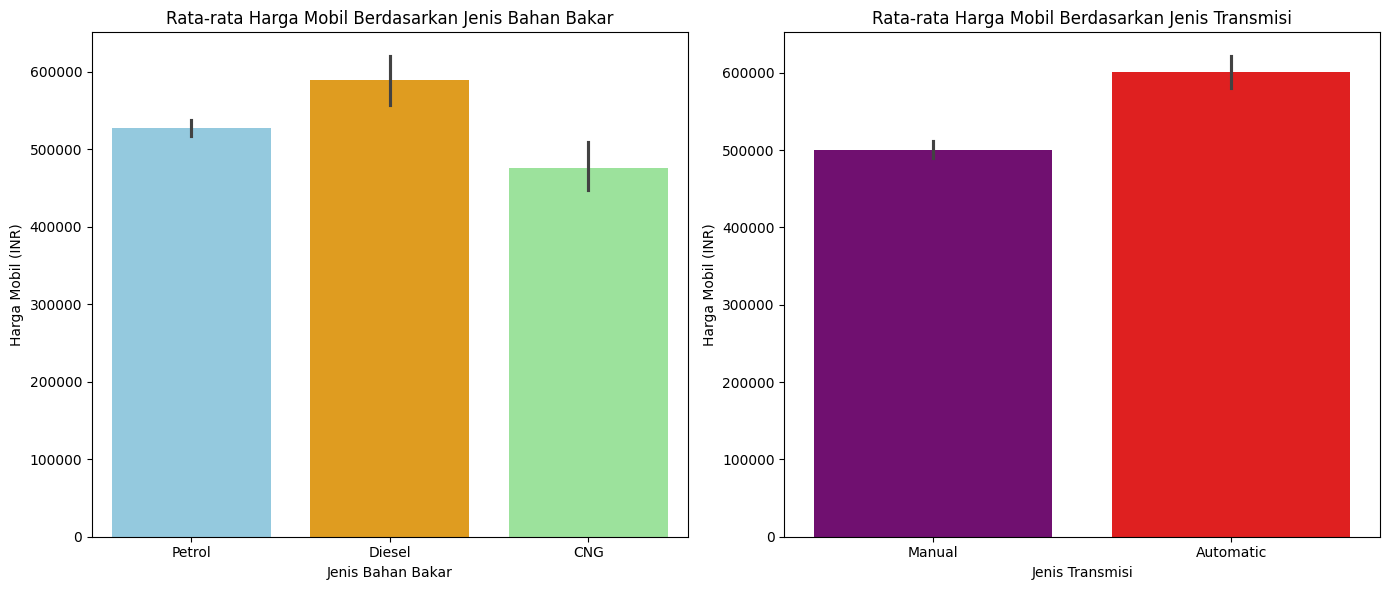

In [ ]:
#Categorical Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Rata-rata harga mobil berdasarkan bahan bakar (Barchart)
sns.barplot(data=df, x="Fuel type", y="Price", estimator=np.mean,
            hue="Fuel type", palette={"Petrol": "skyblue", "Diesel": "orange", "CNG": "lightgreen"},
            legend=False, ax=axes[0])
axes[0].set_title("Rata-rata Harga Mobil Berdasarkan Jenis Bahan Bakar")
axes[0].set_xlabel("Jenis Bahan Bakar")
axes[0].set_ylabel("Harga Mobil (INR)")

# Rata-rata harga mobil berdasarkan transmisi (Barchart)
sns.barplot(data=df, x="Transmission", y="Price", estimator=np.mean,
            hue="Transmission", palette={"Manual": "purple", "Automatic": "red"},
            legend=False, ax=axes[1])
axes[1].set_title("Rata-rata Harga Mobil Berdasarkan Jenis Transmisi")
axes[1].set_xlabel("Jenis Transmisi")
axes[1].set_ylabel("Harga Mobil (INR)")

plt.tight_layout()
plt.show()

**REMOVE THE OUTLIER**

In [ ]:
# Menghapus outlier harga menggunakan IQR
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Price"] >= (Q1 - 1.5 * IQR)) & (df["Price"] <= (Q3 + 1.5 * IQR))]

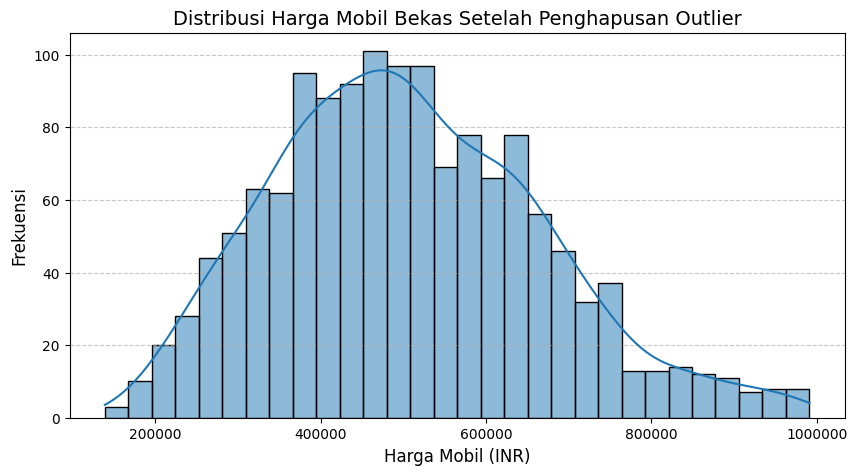

In [ ]:
# Histogram Harga Mobil setelah dihapus outlier nya
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribusi Harga Mobil Bekas Setelah Penghapusan Outlier", fontsize=14)
plt.xlabel("Harga Mobil (INR)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Distribusi harga asli
plt.ticklabel_format(style='plain', axis='x')

plt.show()